In [1]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Input,Activation,Flatten
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np

filters_per_conv_layer = [16,16,24]
neurons_per_dense_layer = [42,64]
batch_size=250

x = x_in = Input((15,15,1))

for i,f in enumerate(filters_per_conv_layer):
    print( ('Adding convolutional block {} with N={} filters').format(i,f) )
    x = Conv2D(int(f), kernel_size=(2,2), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_{}'.format(i))(x) 
    x = BatchNormalization(name='bn_conv_{}'.format(i))(x)
    x = Activation('relu',name='conv_act_%i'%i)(x)
    x = MaxPooling2D(pool_size = (2,2),name='pool_{}'.format(i) )(x)
x = Flatten()(x)

for i,n in enumerate(neurons_per_dense_layer):
    print( ('Adding dense block {} with N={} neurons').format(i,n) )
    x = Dense(n,kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001),name='dense_%i'%i, use_bias=False)(x)
    x = BatchNormalization(name='bn_dense_{}'.format(i))(x)
    x = Activation('relu',name='dense_act_%i'%i)(x)
x = Dense(2,name='output_dense')(x)
x_out = Activation('softmax',name='output_softmax')(x)

model = Model(inputs=[x_in], outputs=[x_out], name='keras_baseline')
model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=1.578e-5),
                      metrics=['accuracy'],)


2022-12-08 03:14:40.284586: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


Adding convolutional block 0 with N=16 filters


2022-12-08 03:14:41.592853: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-08 03:14:41.625811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:43:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.65GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-12-08 03:14:41.625863: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-12-08 03:14:41.627759: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-08 03:14:41.629534: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2022-12-08 03:14:41.629905: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcur

Adding convolutional block 1 with N=16 filters
Adding convolutional block 2 with N=24 filters
Adding dense block 0 with N=42 neurons
Adding dense block 1 with N=64 neurons


In [2]:
import h5py
f = h5py.File('jetImages.h5','r')
x_train = f.get("x_train").value
x_test  = f.get("x_test").value

y_train = f.get("y_train").value
y_test  = f.get("y_test").value

/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys


In [3]:
history_cnn = model.fit(x_train, y_train, 
                            validation_split=0.2, epochs=150, batch_size=256,
                        shuffle=True, verbose=1)

Epoch 1/150


2022-12-08 03:14:43.401279: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-08 03:14:43.595053: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7


360/360 [==============================] - 2s 6ms/step - loss: 0.5792 - accuracy: 0.7959 - val_loss: 0.4613 - val_accuracy: 0.8870
Epoch 2/150
360/360 [==============================] - 2s 5ms/step - loss: 0.4802 - accuracy: 0.8611 - val_loss: 0.4406 - val_accuracy: 0.8857
Epoch 3/150
360/360 [==============================] - 2s 6ms/step - loss: 0.4304 - accuracy: 0.8878 - val_loss: 0.4134 - val_accuracy: 0.8944
Epoch 4/150
360/360 [==============================] - 2s 5ms/step - loss: 0.4005 - accuracy: 0.8999 - val_loss: 0.3922 - val_accuracy: 0.9009
Epoch 5/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3822 - accuracy: 0.9058 - val_loss: 0.3777 - val_accuracy: 0.9046
Epoch 6/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3702 - accuracy: 0.9091 - val_loss: 0.3688 - val_accuracy: 0.9072
Epoch 7/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3623 - accuracy: 0.9113 - val_loss: 0.3625 - val_accuracy: 0.9084
Epoch 8/150

360/360 [==============================] - 2s 5ms/step - loss: 0.3159 - accuracy: 0.9215 - val_loss: 0.3260 - val_accuracy: 0.9168
Epoch 59/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3154 - accuracy: 0.9213 - val_loss: 0.3258 - val_accuracy: 0.9168
Epoch 60/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3152 - accuracy: 0.9212 - val_loss: 0.3255 - val_accuracy: 0.9167
Epoch 61/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3152 - accuracy: 0.9212 - val_loss: 0.3253 - val_accuracy: 0.9167
Epoch 62/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3144 - accuracy: 0.9214 - val_loss: 0.3252 - val_accuracy: 0.9168
Epoch 63/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3139 - accuracy: 0.9216 - val_loss: 0.3249 - val_accuracy: 0.9170
Epoch 64/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3140 - accuracy: 0.9215 - val_loss: 0.3245 - val_accuracy: 0.9166
Epoch

Epoch 115/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3011 - accuracy: 0.9239 - val_loss: 0.3156 - val_accuracy: 0.9190
Epoch 116/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3011 - accuracy: 0.9234 - val_loss: 0.3155 - val_accuracy: 0.9193
Epoch 117/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3009 - accuracy: 0.9235 - val_loss: 0.3153 - val_accuracy: 0.9190
Epoch 118/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3005 - accuracy: 0.9238 - val_loss: 0.3152 - val_accuracy: 0.9193
Epoch 119/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3008 - accuracy: 0.9233 - val_loss: 0.3151 - val_accuracy: 0.9192
Epoch 120/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3004 - accuracy: 0.9237 - val_loss: 0.3149 - val_accuracy: 0.9193
Epoch 121/150
360/360 [==============================] - 2s 6ms/step - loss: 0.3000 - accuracy: 0.9236 - val_loss: 0.3149 - val_ac

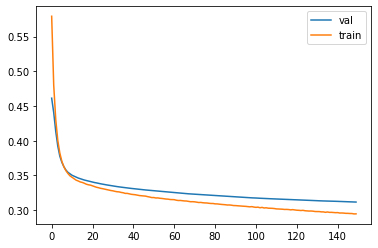

In [4]:
from matplotlib import pyplot as plt
plt.plot(history_cnn.history['val_loss'], label='val')
plt.plot(history_cnn.history['loss'], label='train')
plt.legend()
plt.show()

In [5]:
model.summary()

Model: "keras_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (Conv2D)              (None, 14, 14, 16)        64        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 16)        64        
_________________________________________________________________
conv_act_0 (Activation)      (None, 14, 14, 16)        0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 16)          0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 6, 6, 16)          1024      
_________________________________________________________________
bn_conv_1 (BatchNormalizatio (None, 6, 6, 16)       

In [6]:
def getCallbacks(outdir_):
    import tensorflow as tf
    callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
      tf.keras.callbacks.ModelCheckpoint(filepath=outdir_+'/model_best.h5',monitor="val_loss",verbose=0,save_best_only=True), 
      tf.keras.callbacks.ModelCheckpoint(filepath=outdir_+'/weights_best.h5',monitor="val_loss",verbose=0,save_weights_only=True),
      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=2, min_lr=1E-6)
    ]

In [7]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks
from qkeras.autoqkeras.utils import print_qmodel_summary


NSTEPS = int(x_train.shape[0]*0.9)  // 250 #90% train, 10% validation in 10-fold cross validation
print('Number of training steps per epoch is {}'.format(NSTEPS))

# Prune all convolutional and dense layers gradually from 0 to 50% sparsity every 2 epochs, 
# ending by the 10th epoch
def pruneFunction(layer):
    pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity = 0.0,
                                                                   final_sparsity = 0.50, 
                                                                   begin_step = NSTEPS*2, 
                                                                   end_step = NSTEPS*10, 
                                                                   frequency = NSTEPS)
                     }
    if isinstance(layer, tf.keras.layers.Conv2D):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
    if isinstance(layer, tf.keras.layers.Dense) and layer.name!='output_dense':
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)  
    return layer

model_pruned = tf.keras.models.clone_model( model, clone_function=pruneFunction)

Number of training steps per epoch is 414
Instructions for updating:
Please use `layer.add_weight` method instead.


In [8]:

import time
train =True

if train:
    LOSS        = tf.keras.losses.CategoricalCrossentropy()
    OPTIMIZER   = tf.keras.optimizers.Adam(learning_rate=3E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

    model_pruned.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])

    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1,batch_size=batch_size),
                 pruning_callbacks.UpdatePruningStep()] 

    start = time.time()
    model_pruned.fit(x_train,y_train,epochs = 30,validation_split=0.1,callbacks=callbacks)
                 #validation_data = x_test,
                 #callbacks = callbacks)   
    end = time.time()

    print('It took {} minutes to train Keras model'.format( (end - start)/60.))
    model_pruned.save('pruned_cnn_model.h5')
else:
    from qkeras.utils import _add_supported_quantized_objects
    from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper
    
    co = {}
    _add_supported_quantized_objects(co)
    co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude
    model_pruned = tf.keras.models.load_model('pruned_cnn_model.h5',custom_objects=co)

Epoch 1/30
3235/3235 [==============================] - 25s 8ms/step - loss: 0.3010 - accuracy: 0.9166 - val_loss: 0.2763 - val_accuracy: 0.9218
Epoch 2/30
3235/3235 [==============================] - 25s 8ms/step - loss: 0.2676 - accuracy: 0.9204 - val_loss: 0.2693 - val_accuracy: 0.9143
Epoch 3/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2591 - accuracy: 0.9215 - val_loss: 0.2600 - val_accuracy: 0.9213
Epoch 4/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2534 - accuracy: 0.9235 - val_loss: 0.2515 - val_accuracy: 0.9239
Epoch 5/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2491 - accuracy: 0.9236 - val_loss: 0.2804 - val_accuracy: 0.9154
Epoch 6/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2464 - accuracy: 0.9242 - val_loss: 0.2441 - val_accuracy: 0.9255
Epoch 7/30
3235/3235 [==============================] - 25s 8ms/step - loss: 0.2449 - accuracy: 0.9246 - val_loss: 0.2515 - val_ac

In [9]:
# These are the quantizers we'll test in the bayesian optimization
quantization_config = {
        "kernel": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        },
        "bias": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        },
        "activation": {
                "quantized_relu(3,1)": 3,
                "quantized_relu(4,2)": 4,
                "quantized_relu(8,2)": 8,
                "quantized_relu(8,4)": 8,
                "quantized_relu(16,6)": 16
        },
        "linear": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        }
}

# These are the layer types we will quantize
limit = {
    "Dense": [8, 8, 16],
    "Conv2D": [8, 8, 16],
    "Activation": [16],
}

# Use this if you want to minimize the model bit size
goal_bits = {
    "type": "bits",
          "params": {
              "delta_p": 8.0, # We tolerate up to a +8% accuracy change
              "delta_n": 8.0, # We tolerate down to a -8% accuracy change
              "rate": 2.0,    # We want a x2 times smaller model
              "stress": 1.0,  # Force the reference model size to be smaller by setting stress<1
              "input_bits": 8,
              "output_bits": 8,
              "ref_bits": 8,
              "config": {
                  "default": ["parameters", "activations"]
              }
          }
}

# Use this if you want to minimize the model energy consumption
goal_energy = {
    "type": "energy",
    "params": {
        "delta_p": 8.0,
        "delta_n": 8.0,
        "rate": 2.0,
        "stress": 1.0,
        "process": "horowitz",
        "parameters_on_memory": ["sram", "sram"],
        "activations_on_memory": ["sram", "sram"],
        "rd_wr_on_io": [False, False],
        "min_sram_size": [0, 0],
        "source_quantizers": ["fp32"],
        "reference_internal": "int8",
        "reference_accumulator": "int32"
        }
}

run_config = {
        "goal": goal_bits,
        "quantization_config": quantization_config,
        "learning_rate_optimizer": False,
        "transfer_weights": False, # Randomely initialize weights
        "mode": "bayesian", # This can be bayesian,random,hyperband
        "seed": 42,
        "limit": limit,
        "tune_filters": "layer",
        "tune_filters_exceptions": "^output",
        "distribution_strategy": None,
        "layer_indexes":range(1,len(model.layers) -1),
        "max_trials": 20 # Let's just do 5 trials for this demonstrator, ideally you should do as many as possible
}


In [10]:
from qkeras.autoqkeras import AutoQKeras

autoqk = AutoQKeras(model, output_dir="autoq_cnn", metrics=["acc"], custom_objects={}, **run_config)
autoqk.fit(x_train,y_train, validation_split=0.1, epochs=15)

aqmodel = autoqk.get_best_model()
print_qmodel_summary(aqmodel)   

Trial 20 Complete [00h 05m 33s]
val_score: 1.0938894748687744

Best val_score So Far: 1.1009265184402466
Total elapsed time: 01h 53m 12s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


learning_rate: 1.5780000467202626e-05
Model: "keras_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (QConv2D)             (None, 14, 14, 8)         32        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 8)         32        
_________________________________________________________________
conv_act_0 (QActivation)     (None, 14, 14, 8)         0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
conv_1 (QConv2D)             (None, 6, 6, 8)           256       
_________________________________________________________________
bn_conv_1 (Bat

In [11]:
# This model has some remnants from the optimization procedure attached to it, so let's define a new one
#aqmodel.save_weights("autoqkeras_cnn_weights.h5")
aqmodel.save_weights("autoqkeras_cnn_weights.h5")

layers = [l for l in aqmodel.layers]
x = layers[0].output
for i in range(1, len(layers)):
    x = layers[i](x)

new_model = Model(inputs=[layers[0].input], outputs=[x])   
LOSS        = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER   = tf.keras.optimizers.Adam(learning_rate=3E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

new_model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])
new_model.summary()
new_model.load_weights("autoqkeras_cnn_weights.h5")
print_qmodel_summary(new_model)  

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (QConv2D)             (None, 14, 14, 8)         32        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 8)         32        
_________________________________________________________________
conv_act_0 (QActivation)     (None, 14, 14, 8)         0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
conv_1 (QConv2D)             (None, 6, 6, 8)           256       
_________________________________________________________________
bn_conv_1 (BatchNormalizatio (None, 6, 6, 8)          

In [12]:
predictions_cnn = model.predict(x_test)
predictions_q   = new_model.predict(x_test)
new_model.save('q_cnn.h5')

In [13]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
#fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), predictions_q2.ravel())
#fpr3, tpr3, thresholds = roc_curve(y_test.ravel(), predictions_q3.ravel())



from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
auc1 = auc(fpr1, tpr1)

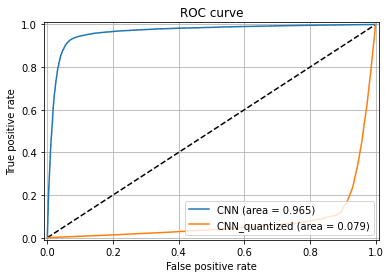

In [14]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.3f})'.format(auc0))
plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');

In [15]:
import hls4ml
import plotting
#hls4ml.model.optimizer.OutputRoundingSaturationMode.layers = ['Activation']
#hls4ml.model.optimizer.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
#hls4ml.model.optimizer.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'

hls_config_aq = hls4ml.utils.config_from_keras_model(new_model, granularity='name')
hls_config_aq['Model']['ReuseFactor'] = 10
hls_config_aq['Model']['Strategy'] = 'Resource'
#for lname,val in hls_config_aq['LayerName'].items():
#    hls_config_aq['LayerName'][lname]['ReuseFactor']=10
#hls_config_aq['Model']['Precision'] = 'ap_fixed<10,2>'
#hls_config_aq['LayerName']['softmax']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)
  
cfg_aq = hls4ml.converters.create_config(backend='Vivado')
cfg_aq['IOType']     = 'io_parallel' # io_stream Must set this if using CNNs!
cfg_aq['HLSConfig']  = hls_config_aq
cfg_aq['KerasModel'] = new_model
cfg_aq['OutputDir']  = 'autoqkeras_cnn/vu9p_parallel'
cfg_aq['XilinxPart'] = 'xcvu13p-flga2577-2L-e'# A vu13p target. #'xcu250-figd2104-2L-e'
hls_model_aq = hls4ml.converters.keras_to_hls(cfg_aq)
hls_model_aq.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: Input
Layer name: conv_0, layer type: QConv2D
  -> Activation (linear), layer name: conv_0
Layer name: bn_conv_0, layer type: BatchNormalization
Layer name: conv_act_0, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_0
Layer name: pool_0, layer type: MaxPooling2D
Layer name: conv_1, layer type: QConv2D
  -> Activation (linear), layer name: conv_1
Layer name: bn_conv_1, layer type: BatchNormalization
Layer name: conv_act_1, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_1
Layer name: pool_1, layer type: MaxPooling2D
Layer name: conv_2, layer type: QConv2D
  -> Activation (linear), layer name: conv_2
Layer name: bn_conv_2, layer type: BatchNormalization
Layer name: conv_act_2, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_2
Layer name: pool_2, layer type: MaxPooling2D
Layer name: dense_0, layer type: QDense
  -> Activ

In [16]:
from keras.models import model_from_json
json_model = new_model.to_json()
with open('autoQKeras_cnn.json','w') as aFile:
    aFile.write(json_model)

Using TensorFlow backend.


In [17]:
y_predict_aq        = aqmodel.predict(x_test)
y_predict_hls4ml_aq = hls_model_aq.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_keras  = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_aq,axis=1)))
accuracy_hls4ml = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_hls4ml_aq,axis=1)))

print("Accuracy AutoQ Keras:  {}".format(accuracy_keras))
print("Accuracy AutoQ hls4ml: {}".format(accuracy_hls4ml))

Accuracy AutoQ Keras:  0.11258053577483892
Accuracy AutoQ hls4ml: 0.2730521428385111


In [19]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), y_predict_hls4ml_aq.ravel())

In [20]:
from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

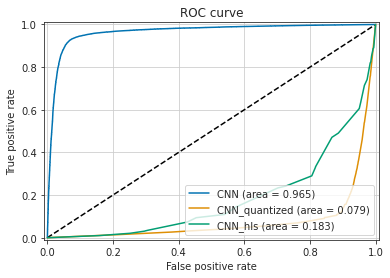

In [21]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.3f})'.format(auc0))
plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.plot(fpr2, tpr2, label='CNN_hls (area = {:.3f})'.format(auc2))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('qgTaggerPerformance.png')

In [ ]:
import os
os.environ['PATH'] = '/tools/Xilinx/Vivado/2018.3/bin:' + os.environ['PATH']
synth = True
if synth:
    hls_model_aq.build(csim=False, synth=True, vsynth=True)
    data_autoq = getReports('autoqkeras_cnn/vu9p_parallel')

    print("\n Resource usage and latency: AutoQ")
    pprint.pprint(data_autoq)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2018.3/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2018.3/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rnarayan' on host 'gpu1' (Linux_x86_64 version 3.10.0-1160.66.1.el7.x86_64) on Thu Dec 08 05:26:09 CST 2022
INFO: [HLS 200-10] On os "CentOS Linux release 7.9.2009 (Core)"
INFO: [HLS 200-10] In directory '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel'
INFO: [HLS 200-10] Opening project '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test be

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:31 ; elapsed = 00:00:32 . Memory (MB): peak = 722.805 ; gain = 197.617 ; free physical = 67221 ; free virtual = 94930
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [XFORM 203-602] Inlining function 'nnet::cast<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2_mult>' into 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv2d_resource.h:97->firmware/nnet_utils/nnet_conv2d.h:73) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode

INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:36 ; elapsed = 00:00:37 . Memory (MB): peak = 783.996 ; gain = 258.809 ; free physical = 67180 ; free virtual = 94889
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::softmax_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, softmax_config28>' (firmware/nnet_utils/nnet_activation.h:204:45).
INFO: [XFORM 203-502] Unrolling small iteration loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:64) in function 'nnet::dense_resource<ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config26>' automatically.
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config25>' (firmware/nnet_utils/nnet_activation.h:66:39).
INFO: [XFORM 203-502] Unrolling all loops 

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_resource.h:98) in function 'nnet::dense_resource<ap_ufixed<8, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config22>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<8, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config21>' completely with a factor of 21.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_batchnorm.h:77) in function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>' completely with a factor of 21.
INFO: [HLS 200-489] Unrolling loop 'InitAccum' (firmware/nnet_utils/nnet_dense_resource.h:58) in function 'nnet::dense_resource<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, con

INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_pooling.h:13) in function 'nnet::max<ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, 4>' completely with a factor of 3.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config5>' completely with a factor of 1568.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_batchnorm.h:77) in function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>' completely with a factor of 1568.
INFO: [HLS 200-489] Unrolling loop 'InitAccumLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:46) in function 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' completely with a factor of 8.
INFO: [HLS 200-489] Unrolling loo

INFO: [XFORM 203-602] Inlining function 'nnet::cast<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2_mult>' into 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv2d_resource.h:97->firmware/nnet_utils/nnet_conv2d.h:73) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:17) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'scale[27].V' to 's24.V.27'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (fi

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'bias[23].V' to 'b24.V.23'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:125) by setting 'bias[1].V' to 'b20.V.1'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:125) by setting 'bias[

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0' at call site (firmware/myproject.cpp:109) by setting 'scale[5].V' to 's14.V.5'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:109) by setting 'scale[6].V' to 's14.V.6'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_f

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0' at call site (firmware/myproject.cpp:93) by setting 'scale[1].V' to 's9.V.1'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0.0' at call site (firmware/myproject.cpp:93) by setting 'scale[2].V' to 's9.V.2'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0' at call site (firmware/myproject.cpp:77) by setting 'scale[4].V' to 's4.V.4'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0.0' at call site (firmware/myproject.cpp:77) by setting 'scale[5].V' to 's4.V.5'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (a

INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation.h:64:18) to (firmware/nnet_utils/nnet_activation.h:74:1) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<8, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config21>'... converting 43 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation.h:64:18) to (firmware/nnet_utils/nnet_activation.h:74:1) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config5>'... converting 3137 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation.h:64:18) to (firmware/nnet_utils/nnet_activation.h:74:1) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config25>'... converting 65 basic blocks.
INFO: [XFORM 203-4

INFO: [XFORM 203-531] Rewinding loop 'PartitionLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:36) in function 'conv_2d_cl<ap_fixed,ap_fixed<16,6,5,3,0>,config7>'.
INFO: [XFORM 203-531] Rewinding loop 'PartitionLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:36) in function 'conv_2d_cl<ap_fixed,ap_fixed<16,6,5,3,0>,config2>'.
INFO: [XFORM 203-531] Rewinding loop 'PartitionLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:36) in function 'conv_2d_cl<ap_fixed,ap_fixed<16,6,5,3,0>,config12>'.
INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 03:50:27 ; elapsed = 03:50:50 . Memory (MB): peak = 6093.188 ; gain = 5568.000 ; free physical = 61816 ; free virtual = 89591
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'fill_buffer_1' 
INFO: [HLS 200-10] ----------------------------------------------

INFO: [SCHED 204-61] Pipelining loop 'PartitionLoop'.
   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local variable 'data_buf[0][3].V' and 'load' operation ('data_buf_0_3_V_1_load') on local variable 'data_buf[0][3].V'.
   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local variable 'data_buf[0][3].V' and 'load' operation ('data_buf_0_3_V_1_load') on local variable 'data_buf[0][3].V'.
   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local 

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'fill_buffer' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'fill_buffer'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 47.19 seconds; current allocated memory: 3.061 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 29.78 seconds; current allocated memory: 3.069 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implem

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 4.12 seconds; current allocated memory: 3.205 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config16_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'pooling2d_cl<ap_ufixed,ap_fixed<16,6,5,3,0>,config16>'.
INFO: [SCHED 204-61] Pipelining result : Target II = 10, Final II = 1, Depth = 1.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 4.29 seconds; current allocated memory: 3.206 GB.
INFO: [BIND 205-100] Starting

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'softmax_latency_ap_fixed_ap_fixed_softmax_config28_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'softmax_latency<ap_fixed,ap_fixed,softmax_config28>'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 6.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 7.05 seconds; current allocated memory: 3.220 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.61 seconds; current allocated memory: 3.220 GB.
INFO: [HLS 200-10] --------------